In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

D = DT.load_breast_cancer()
X = D.data
y = D.target

################################################################
# Consider malignant cases as positive (class 1)
# Need to invert classes
y = np.abs(y - 1)
################################################################

# division int training and test sub-sets
X1, X2, y1, y2 = train_test_split(X, y, test_size=169, stratify=y, random_state=42)

## Question 1: Logistic Discriminants
####  Consider a logistic discriminant with the following parameters {C=2}$, {solver='saga'}$, $\texttt{penalty='l1'}$ and {max_iter=5000}$. Train the classifier with the training set.
##### a) Print the total number of errors and the confusion matrix  (non-normalized) of this classifier for the test set.

In [10]:
logD = LogisticRegression(penalty="l1", solver="saga", C=2, max_iter=5000).fit(X1, y1)
y2e = logD.predict(X2)
print("Total number of errors", np.sum(y2 != y2e))
print("Confusion Matrix:")
print(confusion_matrix(y2, y2e))

Total number of errors 13
Confusion Matrix:
[[105   1]
 [ 12  51]]


##### b) Calibrate this classifier in order to have a maximum number of false negatives in the test less than or equal to 5, while keeping the total number of errors below 15.¶

In [18]:
y2c = logD.decision_function(X2)
thresh = -1.5
print("Total number of errors", np.sum(y2 != (y2c > thresh)))
print("Confusion Matrix:")
print(confusion_matrix(y2, y2c > thresh))

Total number of errors 14
Confusion Matrix:
[[97  9]
 [ 5 58]]


##### c) Plot the ROC curve of this classifier with the test data. Include in this plot the operational point of the classifiers in items 1.a) and 1.b).

Text(0, 0.5, 'TP-rate')

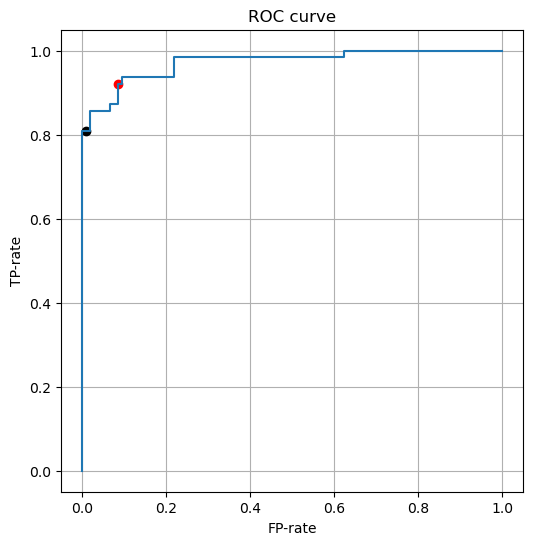

In [22]:
fpr, tpr, t = roc_curve(y2, y2c)

# Classificador 1
# fp-rate=FP/(FP+TN)
p11 = 1 / (105 + 1)
# tp-rate=TP/(TP+FN)
p12 = 51 / (51 + 12)

# Classificador 2
# fp-rate=FP/(FP+TN)
p21 = 9 / (97 + 9)
# tp-rate=TP/(TP+FN)
p22 = 58 / (5 + 58)

plt.figure(figsize=(6, 6))
plt.plot(p11, p12, "ok")
plt.plot(p21, p22, "or")

plt.plot(fpr, tpr)
plt.axis("scaled")
plt.grid(True)
plt.title("ROC curve")
plt.xlabel("FP-rate")
plt.ylabel("TP-rate")

## Question 2 - SVMs:
#### Consider a $\texttt{SVC}$ classifier with the following parameters: $\texttt{kernel='rbf'}$ and $\texttt{C=2}$.
##### a) Preprocess the data using the function  $\texttt{StandardScaler}$. Train this function with the training data and apply the transformation to the training and test sets. Use the pre-processed data in the following items.

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

##### b) Train the $\texttt{SVC}$ classifier with the training data and plot the ROC curve of this classifier with the test data. Include in this plot the operating point of the classifier.

[[106   0]
 [  3  60]]


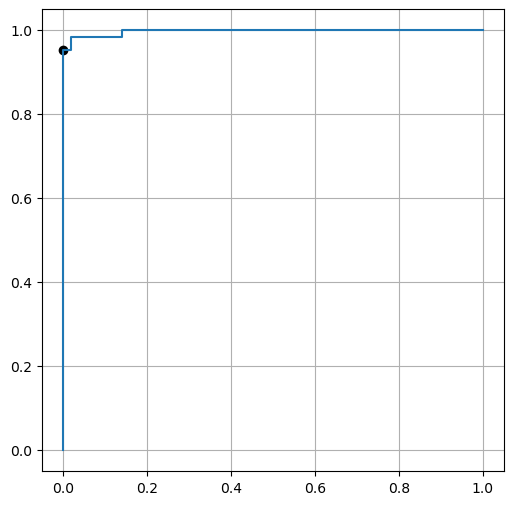

In [7]:
svm = SVC(kernel="rbf", C=2).fit(X1n, y1)
y2c = svm.decision_function(X2n)
fpr, tpr, t = roc_curve(y2, y2c)

print(confusion_matrix(y2, svm.predict(X2n)))

# fp-rate=FP/(FP+TN)
p1 = 0
# tp-rate=TP/(TP+FN)
p2 = 60 / (3 + 60)

plt.figure(figsize=(6, 6))
plt.plot(p1, p2, "ok")
plt.plot(fpr, tpr)
plt.axis("scaled")
plt.grid(True)

##### c)  Calibrate the classifier from the previous section to obtain one (1) false negative in the test data. After calibration, what is the minimum number of false positives obtained in the test set?¶

In [8]:
print(confusion_matrix(y2, y2c >= -0.35))
print("Number of false positives = 2")

[[104   2]
 [  1  62]]
Number of false positives = 2
